In [18]:
import os
import sys
import pandas as pd
import numpy as np
# import random
import matplotlib.pyplot as plt
from similar_companies_choice import get_similar_comp_ranking
from data_preparation import get_financial_data
from data_preparation import compute_ratios
from sklearn.linear_model import LinearRegression

os.chdir(sys.path[0])

In [2]:
studied_comp_ticker = "MMM"
similarity_ranking = get_similar_comp_ranking(studied_comp_ticker)

Number of missing values per column in the dataset:

Ticker                   0
GICS Sector              0
GICS Sub-Industry        0
CUR_MKT_CAP              5
Headquarters Location    0
dtype: int64


In [3]:
print("List of companies ranked similarity of sector/sub-industry, geography, and market cap :")
print(similarity_ranking)

List of companies ranked similarity of sector/sub-industry, geography, and market cap :
Ticker
GE       0.613380
HON      0.663717
ROP      0.720398
FAST     1.177523
CHRW     1.321802
           ...   
BRK.B         NaN
BF.B          NaN
CEG           NaN
NDSN          NaN
PARA          NaN
Name: similarity_score, Length: 505, dtype: float64


In [4]:
group_size = 5
print(f"\nThese {group_size} companies will be chosen to form the group to compare with, based on similarity :")
symbols_comp_group = similarity_ranking[:group_size].index.tolist()
print(symbols_comp_group)


These 5 companies will be chosen to form the group to compare with, based on similarity :
['GE', 'HON', 'ROP', 'FAST', 'CHRW']


In [5]:
companies_data = get_financial_data(symbols_comp_group + [studied_comp_ticker])

    Ticker   CUR_MKT_CAP  CURR_ENTP_VAL      EBIT    EBITDA  GROSS_PROFIT  \
0      MMM  9.566949e+10   108530.49040  7369.000  9420.000      16560.00   
81    CHRW  1.360319e+10    15438.86090   673.268   861.446       1169.39   
192   FAST  3.261734e+10    33017.93818  1217.400  1388.100       2777.20   
212     GE  1.037520e+11    85732.99585  3676.000  6279.000      18017.00   
235    HON  1.407690e+11   151172.72990  5696.000  6912.000      10468.00   
407    ROP  4.611378e+10    54090.37888  1431.100  2020.400       3543.00   

      PE_RATIO  
0    16.427379  
81   18.163200  
192  35.372980  
212        NaN  
235  27.223161  
407  42.184733  


In [6]:
companies_data

,Ticker,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO
0,MMM,9.566949e+10,108530.49040,7369.000,9420.000,16560.00,16.427379
81,CHRW,1.360319e+10,15438.86090,673.268,861.446,1169.39,18.163200
192,FAST,3.261734e+10,33017.93818,1217.400,1388.100,2777.20,35.372980
212,GE,1.037520e+11,85732.99585,3676.000,6279.000,18017.00,NaN
235,HON,1.407690e+11,151172.72990,5696.000,6912.000,10468.00,27.223161
407,ROP,4.611378e+10,54090.37888,1431.100,2020.400,3543.00,42.184733


In [7]:
print("Number of missing values per column :\n")
print(companies_data.isnull().sum())

Number of missing values per column :

Ticker           0
CUR_MKT_CAP      0
CURR_ENTP_VAL    0
EBIT             0
EBITDA           0
GROSS_PROFIT     0
PE_RATIO         1
dtype: int64


In [8]:
# droping rows with NaN
# nbr_of_na = companies_data.isna().sum().sum()
# if (nbr_of_na > 0):
#     print(f"{nbr_of_na} missing values. Rows with NaN will be dropped.")
#     companies_data = companies_data.dropna(axis='rows')

In [9]:
companies_data = compute_ratios(companies_data)

In [10]:
companies_data

,Ticker,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO,EV_EBIT_ratio,EV_EBITDA_ratio,EV_gross_profit_ratio
0,MMM,9.566949e+10,108530.49040,7369.000,9420.000,16560.00,16.427379,14.727981,11.521283,6.553774
81,CHRW,1.360319e+10,15438.86090,673.268,861.446,1169.39,18.163200,22.931226,17.922030,13.202491
192,FAST,3.261734e+10,33017.93818,1217.400,1388.100,2777.20,35.372980,27.121684,23.786426,11.888931
212,GE,1.037520e+11,85732.99585,3676.000,6279.000,18017.00,NaN,23.322360,13.653925,4.758450
235,HON,1.407690e+11,151172.72990,5696.000,6912.000,10468.00,27.223161,26.540156,21.871055,14.441415
407,ROP,4.611378e+10,54090.37888,1431.100,2020.400,3543.00,42.184733,37.796366,26.772114,15.266830


In [11]:
companies_data = companies_data.set_index("Ticker")

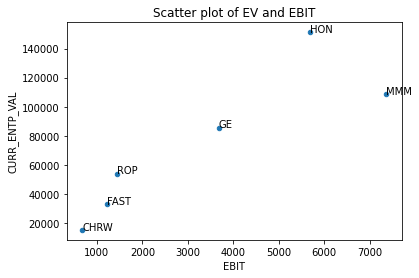

In [12]:
#Scatter plot
stat = "EBIT"
ax = companies_data.plot.scatter(stat, "CURR_ENTP_VAL", title=f"Scatter plot of EV and {stat}")

# Annotate each data point
for i, txt in enumerate(companies_data.index):
   ax.annotate(txt, (companies_data[stat].iat[i]+0.05, companies_data["CURR_ENTP_VAL"].iat[i]))

In [13]:
#calcul des moyennes
print("\nAverages :")
averages = companies_data.mean(axis=0)
print(averages)


Averages :
CUR_MKT_CAP              7.208747e+10
CURR_ENTP_VAL            7.466390e+04
EBIT                     3.343795e+03
EBITDA                   4.480158e+03
GROSS_PROFIT             8.755765e+03
PE_RATIO                 2.787429e+01
EV_EBIT_ratio            2.540663e+01
EV_EBITDA_ratio          1.925447e+01
EV_gross_profit_ratio    1.101865e+01
dtype: float64


# *** TO DO : CHECK EACH COLUMN'S UNIT, TO MAKE SURE EVERYTHING IS ON SAME SCALE (either thousands or millions of dollars) ***

### CCA USING RATIOS

In [25]:
denominators = ["EBIT", "EBITDA", "GROSS_PROFIT"]

for i in range(len(denominators)):
    ratio_to_be_used = f"EV_{denominators[i]}_ratio"
    estimated_EV = averages.loc[ratio_to_be_used] * companies_data.loc[studied_comp_ticker, denominators[i]]

    print("*** ESTIMATIONS ***\n(Values are in millions of dollars)\n")
    print(f"Real EV of {studied_comp_ticker}: {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL']}")
    print(f"Estimated EV of {studied_comp_ticker} (using avg {ratio_to_be_used}): {estimated_EV} ")
    print(f"Real EV / Estimated EV : {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'] / estimated_EV}")
    print("\n\n")

*** ESTIMATIONS ***
(Values are in millions of dollars)

Real EV of MMM: 108530.4904
Estimated EV of MMM (using avg EV_EBIT_ratio): 187221.4481307776 
Real EV / Estimated EV : 0.5796904760836454



*** ESTIMATIONS ***
(Values are in millions of dollars)

Real EV of MMM: 108530.4904
Estimated EV of MMM (using avg EV_EBITDA_ratio): 181377.12805515833 
Real EV / Estimated EV : 0.5983692186756587





KeyError: 'EV_GROSS_PROFIT_ratio'

Estimation of the studied comp's EV from EV / EBIT ratio

In [23]:
# ratio_to_be_used = "EV_EBIT_ratio"
# denominator_stat = "EBIT"
# estimated_EV = averages.loc[ratio_to_be_used] * companies_data.loc[studied_comp_ticker, denominator_stat]

# print("\n\n*** ESTIMATIONS ***\n(Values are in millions of dollars)\n")
# print(f"Real EV of {studied_comp_ticker}: {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL']}")
# print(f"Estimated EV of {studied_comp_ticker} (using avg {ratio_to_be_used}): {estimated_EV} ")
# print(f"Real EV / Estimated EV : {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'] / estimated_EV}")

Estimation of the studied comp's EV from EV / EBITDA ratio

In [21]:
# ratio_to_be_used = "EV_EBIT_ratio"
# denominator_stat = "EBITDA"
# estimated_EV = averages.loc[ratio_to_be_used] * companies_data.loc[studied_comp_ticker, denominator_stat]

# print("\n\n*** ESTIMATIONS ***\n(Values are in millions of dollars)\n")
# print(f"Real EV of {studied_comp_ticker}: {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL']}")
# print(f"Estimated EV of {studied_comp_ticker} (using avg {ratio_to_be_used}): {estimated_EV} ")
# print(f"Real EV / Estimated EV : {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'] / estimated_EV}")

Estimation of the studied comp's EV from EV / gross_profit ratio

In [22]:
# ratio_to_be_used = "EV_gross_profit_ratio"
# denominator_stat = "GROSS_PROFIT"
# estimated_EV = averages.loc[ratio_to_be_used] * companies_data.loc[studied_comp_ticker, denominator_stat]

# print(f"\nReal EV of {studied_comp_ticker}: {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL']}")
# print(f"Estimated EV of {studied_comp_ticker} (using avg {ratio_to_be_used}): {estimated_EV} ")
# print(f"Real EV / Estimated EV : {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'] / estimated_EV}")

### CCA USING LINEAR REGRESSION

Estimation using simple linear regression


Coefs ligne de regression :
a=5.0063
intercept=31870.9145

Real EV of MMM: 108530.4904
Estimated EV of MMM with regression model (using GROSS_PROFIT): 114774.66313732266
Real EV / Estimated EV : 0.9455962442699414



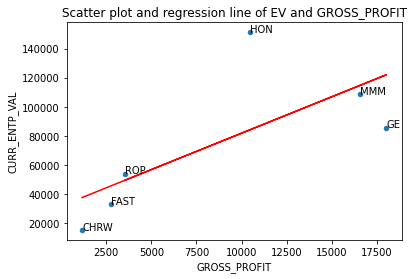

In [19]:
stat_used = "GROSS_PROFIT"
ax = companies_data.plot.scatter(stat_used, "CURR_ENTP_VAL", title=f"Scatter plot and regression line of EV and {stat_used}")
# Annotate each data point
for i, txt in enumerate(companies_data.index):
   ax.annotate(txt, (companies_data[stat_used].iat[i]+0.05, companies_data["CURR_ENTP_VAL"].iat[i]))

X = companies_data[companies_data.index != studied_comp_ticker][[stat_used]].reset_index(drop=True)
Y = companies_data[companies_data.index != studied_comp_ticker]["CURR_ENTP_VAL"].reset_index(drop=True)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
print(f"\nCoefs ligne de regression :\na={round(linear_regressor.coef_[0], 4)}\nintercept={round(linear_regressor.intercept_, 4)}\n")

#EV estimation
studied_comp_row_single_var = companies_data[companies_data.index == studied_comp_ticker][[stat_used]].reset_index(drop=True)
estimated_EV = linear_regressor.predict(studied_comp_row_single_var)[0]

print(f"Real EV of {studied_comp_ticker}: {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL']}")
print(f"Estimated EV of {studied_comp_ticker} with regression model (using {stat_used}): {estimated_EV}")
print(f"Real EV / Estimated EV : {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'] / estimated_EV}\n")

plt.plot(X, X*linear_regressor.coef_ + linear_regressor.intercept_, color='red')
plt.show()

Estimation using multiple linear regression

In [27]:
X = companies_data[companies_data.index != studied_comp_ticker][["EBIT", "EBITDA", "GROSS_PROFIT"]].reset_index(drop=True)
Y = companies_data[companies_data.index != studied_comp_ticker]["CURR_ENTP_VAL"].reset_index(drop=True)

linear_regressor2 = LinearRegression()
linear_regressor2.fit(X, Y)
print(f"\nCoefs ligne de regression :\ncoefs={linear_regressor2.coef_}\nintercept={round(linear_regressor2.intercept_, 4)}\n")

#EV estimation
studied_comp_row_multi_var = companies_data[companies_data.index == studied_comp_ticker][["EBIT", "EBITDA", "GROSS_PROFIT"]].reset_index(drop=True)
estimated_EV = linear_regressor2.predict(studied_comp_row_multi_var)[0]

print(f"Real EV of {studied_comp_ticker}: {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL']}")
print(f"Estimated EV of {studied_comp_ticker} with regression model (using all stats): {estimated_EV}")
print(f"Real EV / Estimated EV : {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'] / estimated_EV}\n")


Coefs ligne de regression :
coefs=[-4.9919262  35.97867415 -7.01193884]
intercept=5369.8391

Real EV of MMM: 108530.4904
Estimated EV of MMM with regression model (using all stats): 191385.73812305802
Real EV / Estimated EV : 0.5670772099549894

